# The Julia programming language
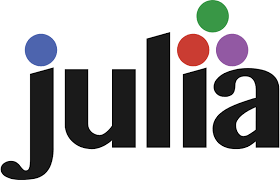

## What is Julia?

* first published in 2012
* general purpuse language, designed for scientific computing
* Julia is compiled, not interpreted
* has package manager with 7,400 packages (Python has more than 200,000)


## The basics

In [ ]:
# variables
x = 10
x + 1

In [1]:
# strings
ch = 'x'
str = "x"

println("All strings are fstrings, using the \$ symbol")
println("\' indicates a character, so the type of the first variable is:$(typeof(ch))")
println("\" indicates a string, so the type of the second variable is: $(typeof(str))")
    
str2 = "yz"
concatenated = str * str2
println("string concatenation is done with *, the result is: $concatenated")

All strings are fstrings, using the $ symbol
' indicates a character, so the type of the first variable is:Char
" indicates a string, so the type of the second variable is: String
string concatenation is done with *, the result is: xyz


In [ ]:
# function declarations
function f(x,y)
   x + y
end

# anonymus funciton
g = (x,y) -> x + y
g(5,6)

In [2]:
# control flow
for i = 1:5
   println(i)
end

# expression blocks with ;
z = (x = 1; y = 2; x + y)

# if statement
if x < y
    println("x is less than y")
elseif x > y
    println("x is greater than y")
else
    println("x is equal to y")
end

# ternary operator
println(x < y ? "less than" : "not less than")

1
2
3
4
5
x is less than y
less than


## The features of Julia

### The type system
* Julia is not pure OoP language, but supports inheritance and interfaces
* functions are not attached to a type
* base type is `Any`, base numeric type is `Number`
* can create custom types with `struct` keyword
* Julia is dynamically typed, but can add types to increase performance
* it is possible to add type annotations

#### Type annotation example

In [6]:
function sinc(x::Float64)::Float64
    if x == 0
        return 1
    end
    return sin(pi*x)/(pi*x)
end

sinc (generic function with 2 methods)

In [4]:
sinc(3.)

3.8981718325193755e-17

In [5]:
sinc(3)

3.8981718325193755e-17

#### Custom type example

In [ ]:
## AoC #7
mutable struct FileTreeNode 
    name::String
    size::Int
    children::Vector{FileTreeNode}
    parent::Union{Nothing,FileTreeNode}
end;

#### Container types
* multi dimensional array type: `Array`
* type alias for 1d array is `Vector`, and for 2d array, `Matrix`
* comprehensions and generators are supported similarly to Python
* Arrays with elements of type `Any` are like Python lists
* for performnace reasons, it is advised to use them with concrete types 

In [7]:
### creating simple array
simple_array = [1,2,3]
simple_array


3-element Vector{Int64}:
 1
 2
 3

In [8]:
array_of_ones = ones((3,2))
array_of_ones

3×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0
 1.0  1.0

In [9]:
# vertical concatenation
[1:2; 4:5;7:8]

6-element Vector{Int64}:
 1
 2
 4
 5
 7
 8

In [12]:
# horizontal concatenation
[1:2  4:5  7:10]

LoadError: ArgumentError: number of rows of each array must match (got (2, 2, 4))

In [11]:
# horizontal concatenation
[1;; 2;; 3;; 4]

1×4 Matrix{Int64}:
 1  2  3  4

In [13]:
# indexing starts from one, end is covered in range
arr = [i^2 for i in 1:10]
arr[1:end]

10-element Vector{Int64}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [14]:
# multidimensional arrays are in column major order
a = [i for i in 1:12]
reshape(a, (3,4))

3×4 Matrix{Int64}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [ ]:
# Python
import numpy as np
a = a = np.arange(1,13) 
a.reshape((3,4))
# Output:
# array([[ 1,  2,  3,  4],
#       [ 5,  6,  7,  8],
#       [ 9, 10, 11, 12]])

### Multiple dispatch

Multiple dispatch is a way of polymorphism, runtime subtype-based.
Deciding which version of a function to execute is based on the runtime type of more than one object.

Advantages
* enables implementing general algorithms that are able to work with multiple types
* enables type specific optimalizations for implementations

Disadvantages:
* can lead to longer compilation times
* can lead to more code



In [ ]:
using LinearAlgebra

# Define a distance function that works with two arguments of any type
function distance(a::T, b::T) where T
    error("Unsupported type")
end

# Specialize the distance function for two vectors
function distance(a::Vector{T}, b::Vector{T}) where T
    norm(a - b)
end

# Specialize the distance function for two points
function distance(a::Tuple{T, T}, b::Tuple{T, T}) where T
    sqrt((a[1] - b[1])^2 + (a[2] - b[2])^2)
end

# Example usage:
v1 = [1, 2, 3]
v2 = [4, 5, 6]
p1 = (1, 2)
p2 = (3, 4)

println(distance(v1, v2)) 
println(distance(p1, p2)) 

In [ ]:
import math

def distance(a, b):
    if type(a) == list and type(b) == list:
        return math.sqrt(sum([(a[i] - b[i]) ** 2 for i in range(len(a))]))
    elif type(a) == tuple and type(b) == tuple:
        return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)
    else:
        raise ValueError("Unsupported type")

v1 = [1, 2, 3]
v2 = [4, 5, 6]
p1 = (1, 2)
p2 = (3, 4)

print(distance(v1, v2)) 
print(distance(p1, p2))


### Broadcasting
* broadcasting allows to do elementwise operations on array of different sizes, such as adding a constant to a vector
* not automatic, explicitly need to do it
* can be done by adding `.` to function call


In [15]:
using Statistics
arr = rand(5,3)

5×3 Matrix{Float64}:
 0.909744   0.83292    0.755904
 0.704228   0.697162   0.384154
 0.222447   0.0325489  0.277696
 0.209216   0.818214   0.185325
 0.0328992  0.953195   0.3088

In [16]:
means = mean(arr, dims = 1)

1×3 Matrix{Float64}:
 0.415707  0.666808  0.382376

In [18]:
# center columns around zero
arr .- means

5×3 Matrix{Float64}:
  0.494037   0.166112    0.373528
  0.288521   0.0303538   0.00177826
 -0.19326   -0.634259   -0.10468
 -0.206491   0.151406   -0.19705
 -0.382808   0.286387   -0.073576

In [17]:
#broadcasting can also be used in function calls
convert.(Float32, [1, 2])

2-element Vector{Float32}:
 1.0
 2.0

In [20]:
# multiplcation table
permutedims(Array(1:3))

1×3 Matrix{Int64}:
 1  2  3

### Parallelism capabilities
* builtin support for paralell computing
* more refined capabilities compared to Python 

Ways of parallel computing in Julia
* asynchronous coroutines
* multi threading
* distributed computing - using `Distributed` library
* GPU computing

In [21]:
# simple multithreading example
a = zeros(10)
Threads.@threads for i = 1:10
   a[i] = Threads.threadid()
end

a

10-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

### Data Visualization


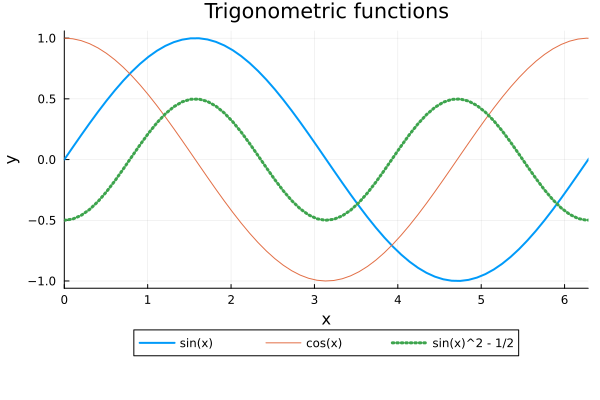

In [22]:
using Plots

x = range(0, 10, length=100)
y1 = sin.(x)
y2 = cos.(x)
y3 = @. sin(x)^2 - 1/2

plot(x, [y1 y2], label=["sin(x)" "cos(x)"], lw=[2 1])
plot!(x, y3, label="sin(x)^2 - 1/2", lw=3, ls=:dot)
plot!(legend=:outerbottom, legendcolumns=3)
xlims!(0, 2pi)
title!("Trigonometric functions")
xlabel!("x")
ylabel!("y")

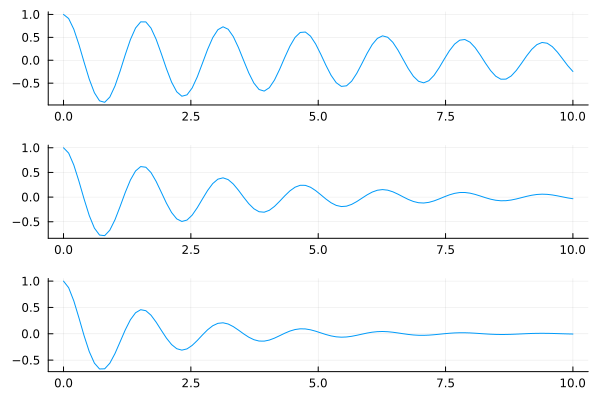

In [23]:
x = range(0, 10, length=100)
y1 = @. exp(-0.1x) * cos(4x)
y2 = @. exp(-0.3x) * cos(4x)
y3 = @. exp(-0.5x) * cos(4x)
plot(x, [y1 y2 y3], layout=(3, 1), legend=false)

## Runtime comparisons with Pyhton

### BFS

In [24]:
function BFS(graph, start, target)
    queue = [start]
    visited = Set([start])
    while !isempty(queue)
        node = popfirst!(queue)
        if node == target
            return true
        end
        for neighbor in graph[node]
            if !(neighbor in visited)
                push!(queue, neighbor)
                push!(visited, neighbor)
            end
        end
    end
    return false
end

# read graph
graph_path = "./demos/graph.gd"
input_as_txt = read(graph_path, String)
lines = split(input_as_txt, "\r\n")

graph = Dict{Int, Array{Int}}(i => [] for i in 1:2000)

for l in lines[2:end]
    from, to, _ = split(l)
    from  = parse(Int, from)
    to = parse(Int, to)
    
    push!(graph[from], to)
end

In [26]:
# time function
@time BFS(graph, 1, 1970) 

  0.001152 seconds (7.29 k allocations: 216.562 KiB)


true

### Summing 100 million numbers

https://github.com/JuliaAcademy/Introduction-to-Julia/blob/main/9%20-%20Julia%20is%20fast.ipynb

## AoC examples

My solutions: 

DataFrame example: https://github.com/kovacsb1/julia_advent_of_code/blob/master/day4.jl

https://github.com/kovacsb1/julia_advent_of_code/blob/master/day14.jl

### Day 7 - File system trees

In [ ]:
fpath = "./advent_of_code/inputs/input_day7.txt" 
L = readlines(fpath)
dir = Vector{String}()
dir_size = Dict{Vector{String},Int}()
for l∈L
    if l=="\$ cd /"
        empty!(dir)
    elseif l=="\$ cd .."
        dir = dir[1:end-1]
    elseif l[1:4]=="\$ cd"
        push!(dir,l[6:end])
    elseif isnumeric(l[1])
        s = parse(Int,first(split(l)))
        for n∈0:length(dir)
            dir_size[dir[1:n]] = get(dir_size,dir[1:n],0)+s
        end
    end
end
sizes = collect(values(dir_size))
p1 = sum(sizes[sizes.<1e5])
p2 = minimum(sizes[sizes.>maximum(sizes)-4e7])
println((p1,p2))

### Day 13 - List comparisons

In [ ]:
import JSON
Base.isless(l::Vector, r::Int) = l < [r]
Base.isless(l::Int, r::Vector) = [l] <= r

fpath = "./advent_of_code/inputs/input_day13.txt"
packets = JSON.parse.(filter(!isempty,readlines(fpath)))
p1 = sum(findall(packets[1:2:end].<packets[2:2:end]))
p2 = prod(invperm(sortperm([[[2]]; [[6]]; packets]))[1:2])
println((p1,p2))

### Day 25 - summation in 5-base arithmetic

In [27]:
D = "=-012"
decode(s) = isempty(s) ? (return 0) : findfirst(s[end],D)-3+5*decode(s[1:end-1])
encode(n;d=27) = map(x->D[x-'0'+1], string(n+(5^d-1)>>1,base=5))
    
fpath = "./advent_of_code/inputs/input_day25.txt" 

# chain function calls with pipes
fpath |> readlines .|> decode |> sum |> encode |> println

0000000121=2=1==0=10=2-20=2


## Why use Julia?


* learning curve is relatively steep
* it is generally faster than Python for scientific computations
* does not have an end-to-end framework for app development
* great plotting functions
* Julia allows you to call Python, C, and Fortran libraries directly. 
* 24th on TIOBE index

## How to start with Julia?

Julia website contains a lot of learning materials: https://julialang.org/learning/